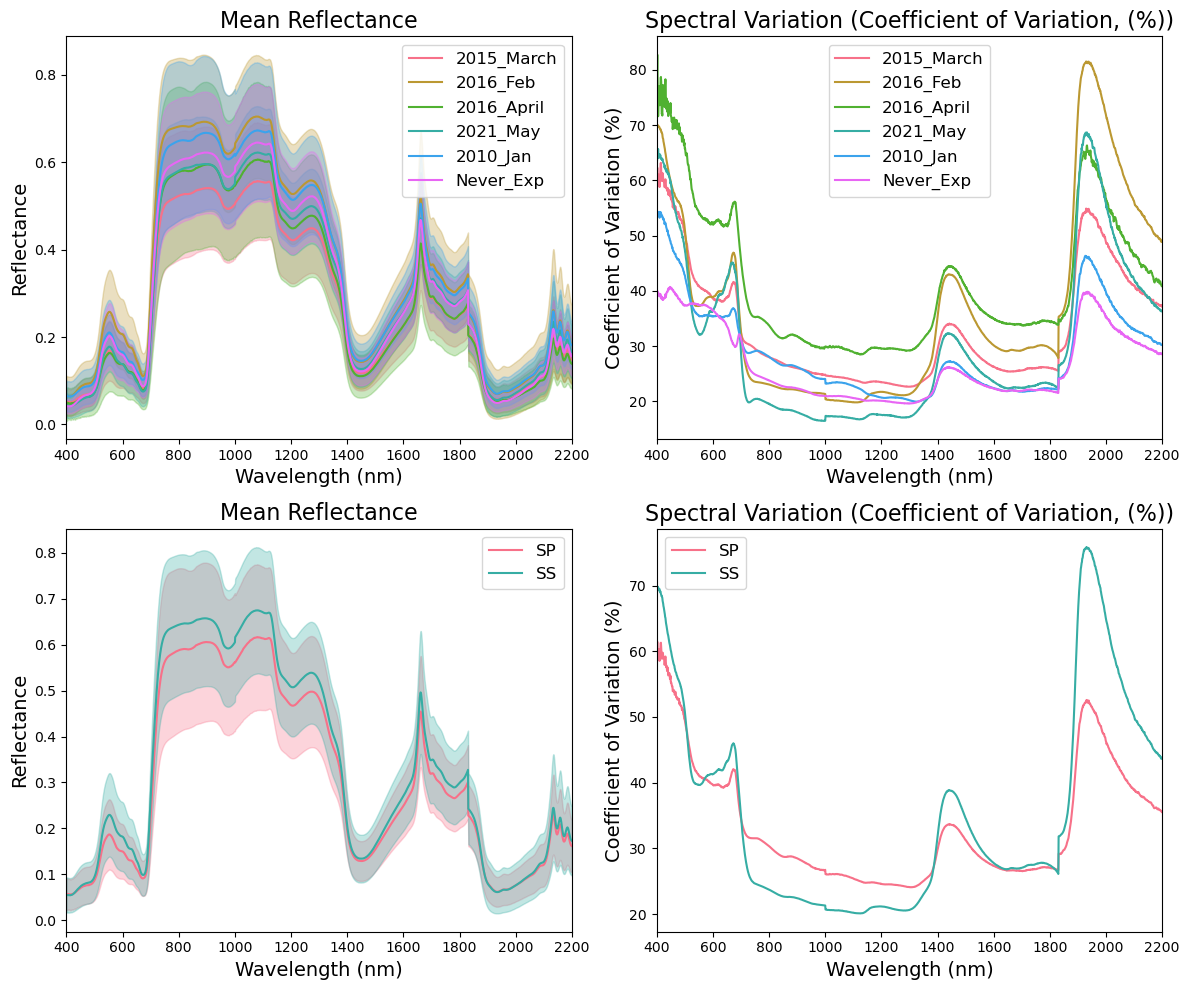

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
try:
    df = pd.read_excel(dataframe)
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Prepare the feature and target variables
X = df.iloc[:, 5:]  # Adjust this if necessary
flavonoids = df.iloc[:, 3]  # Adjust if this is not the correct column
phenolics = df.iloc[:, 4]  # Adjust if this is not the correct column

# Create a wavelength array (assuming the columns correspond to wavelengths)
num_columns = X.shape[1]
wavelengths = np.linspace(400, 2500, num_columns)

# Filter the DataFrame to include only columns corresponding to 400-2200 nm
end_index = np.where(wavelengths <= 2200)[0][-1] + 1  # Get the index for the last column at or before 2200 nm
X_trimmed = X.iloc[:, :end_index]  # Trim X to only include columns up to 2200 nm
wavelengths_trimmed = wavelengths[:end_index]  # Corresponding wavelengths

# Create a mapping of the indices to categories based on the trimmed DataFrame
categories_all = {
    '2015_March': X_trimmed.iloc[:33],
    '2016_Feb': X_trimmed.iloc[33:93],
    '2016_April': X_trimmed.iloc[93:105],
    '2021_May': X_trimmed.iloc[105:121],
    '2010_Jan': X_trimmed.iloc[121:158],
    'Never_Exp': X_trimmed.iloc[158:]
}

categories_ca_ss = {
    'SP': pd.concat([
        X_trimmed.iloc[:33],    # 2015
        X_trimmed.iloc[93:105], # 2016_April
        X_trimmed.iloc[121:158]  # 2010
    ]),
    'SS': pd.concat([
        X_trimmed.iloc[33:93],   # 2016_Feb
        X_trimmed.iloc[105:121], # 2021
        X_trimmed.iloc[158:]      # Never Exp
    ])
}

# Define a function to plot mean reflectance
def plot_mean_reflectance(categories, wavelengths, ax):
    colors = sns.color_palette("husl", len(categories))

    for (label, category), color in zip(categories.items(), colors):
        mean_reflectance = category.mean()
        std_reflectance = category.std()

        ax.plot(wavelengths, mean_reflectance, color=color, label=label)
        ax.fill_between(wavelengths, 
                         mean_reflectance - std_reflectance, 
                         mean_reflectance + std_reflectance,
                         color=color, alpha=0.3)

    ax.set_title('Mean Reflectance', fontsize=16)
    ax.set_xlabel('Wavelength (nm)', fontsize=14)
    ax.set_ylabel('Reflectance', fontsize=14)
    ax.set_xlim(400, 2200)  # Set x-axis limits
    ax.legend(fontsize=12)
    ax.grid(False)

# Define a function to plot coefficient of variation
def plot_coefficient_of_variation(categories, wavelengths, ax):
    colors = sns.color_palette("husl", len(categories))

    for (label, category), color in zip(categories.items(), colors):
        cv = (category.std() / category.mean()) * 100
        ax.plot(wavelengths, cv, color=color, label=label)

    ax.set_title('Spectral Variation (Coefficient of Variation, (%))', fontsize=16)
    ax.set_xlabel('Wavelength (nm)', fontsize=14)
    ax.set_ylabel('Coefficient of Variation (%)', fontsize=14)
    ax.set_xlim(400, 2200)  # Set x-axis limits
    ax.legend(fontsize=12)
    ax.grid(False)

# Create a figure for the 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Run the plotting functions for all categories (a and b)
plot_mean_reflectance(categories_all, wavelengths_trimmed, axs[0, 0])  # a
plot_coefficient_of_variation(categories_all, wavelengths_trimmed, axs[0, 1])  # b

# Run the plotting functions for CA and SS (c and d)
plot_mean_reflectance(categories_ca_ss, wavelengths_trimmed, axs[1, 0])  # c
plot_coefficient_of_variation(categories_ca_ss, wavelengths_trimmed, axs[1, 1])  # d

# Adjust layout
plt.tight_layout()
plt.show()